<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab: Pivot Charts**


Estimated time needed: **30** minutes


## Introduction
In this lab, you will learn how to use pivot charts for data analysis. Pivot charts play a crucial role in data analytics by enabling quick and intuitive exploration of multidimensional datasets. They allow analysts to summarize and visualize complex data relationships across multiple variables, facilitating insights that might be obscured in raw data tables. By dynamically aggregating and pivoting data, these charts provide a comprehensive view of trends, patterns, and correlations, empowering decision-makers to identify key factors influencing outcomes. Pivot charts enhance data-driven decision-making processes by simplifying complex data into actionable visual representations, thereby accelerating understanding and fostering informed strategies in diverse fields such as business analytics, market research, and scientific studies.


## Objectives

After completing this lab you will be able to:

 - Use Pivot charts for data analytics
 - Use different types of charts for different scenarios
 - Make deeper inferences from data based on the pivoted representations


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`sqlite3`](https://docs.python.org/3/library/sqlite3.html) for accessing the database


### Installing Required Libraries

Execute the following code to install the required libraries on the interface


In [ ]:
%pip install pandas seaborn

### Importing Required Libraries

All libraries required for the codes below should be imported here.


In [16]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

### Download the database
Download the databaset from the cloud server by executing the code statement below.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Load the database and read the data table as a Pandas dataframe for further usage, by executing the following code.


In [17]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
QUERY = """SELECT * FROM master"""
df = pd.read_sql(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


In [7]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [8]:
%sql sqlite:///m4_survey_data.sqlite

In [13]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///m4_survey_data.sqlite
Done.


name
EduOther
DevType
LastInt
JobFactors
WorkPlan
WorkChallenge
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear


In [6]:
#conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
QUERY = """select * from DevType"""
df_dev = pd.read_sql(QUERY,conn)

<Axes: xlabel='DevType'>

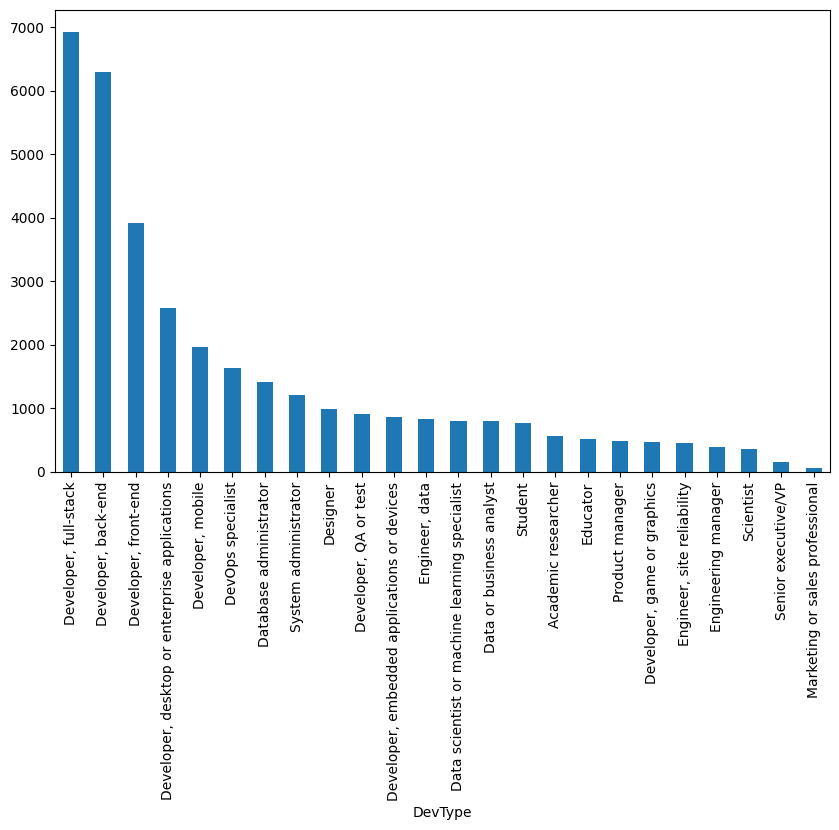

In [8]:
df_dev['DevType'].value_counts().plot(kind='bar', figsize=(10, 6))


<Axes: xlabel='CareerSat'>

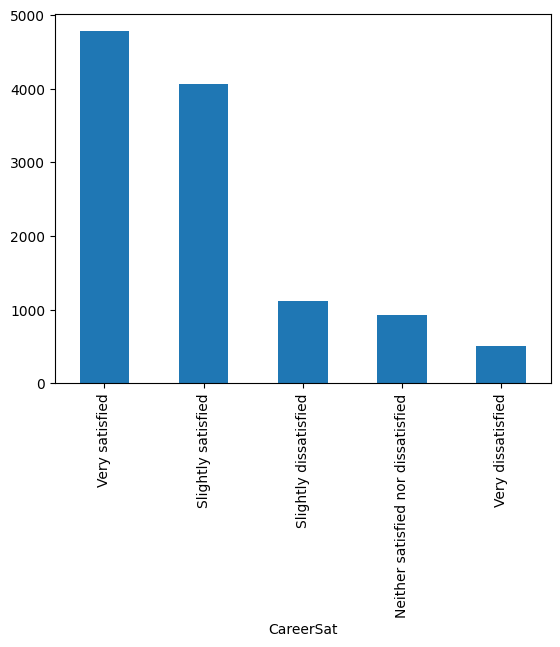

In [4]:
df['CareerSat'].value_counts().plot(kind='bar')

<Axes: xlabel='JobSat'>

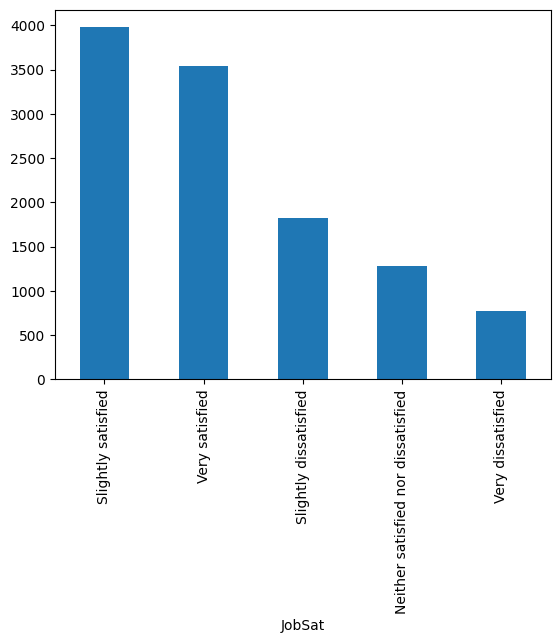

In [5]:
df['JobSat'].value_counts().plot(kind='bar')

### Scenario 1: Distribution of Respondents by Career Satisfaction and Job Satisfaction


In the first task, you can plot a distribution of the distribution of the respondents in terms of their Career Satisfaction and Job satisfaction. For this, we need to create a pivot with one of the axis representing unique values of `CareerSat` field, another axis representing `JobSat` values, and the data to be shown under each map to be set as the count of respondents. To achieve this, you can execute the code block shared below.


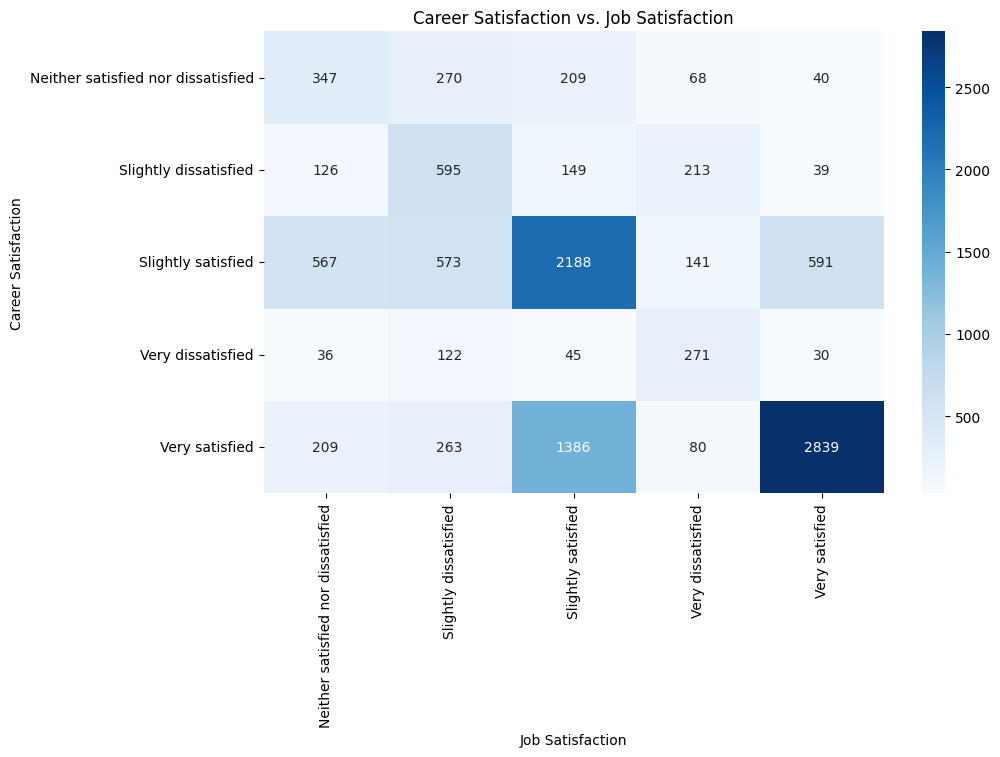

In [6]:
pivot_table = pd.pivot_table(df, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

#### Inference:
Using a heatmap to visualize the relationship between career satisfaction and job satisfaction provides a clear overview of satisfaction levels across different dimensions. We can see that people 'Very Satisfied' with their current jobs are also 'Very Satisfied' with their careers.


### Scenario 2: Comparison of Open Source Adoption Across Operating Systems
In this scenario, you can visualize the adoption of Open Sourse systems across different operating systems by the respondents. To create this pivot chart, the `index` parameter, representing the x-axis, can be set as `OpSys`and the `columns` parameter can be set as `OpenSource`. The `values` parameter will be set as `Respondent` with aggregation function as `count`. This graph should be plotted as a grouped bar graph.

As a practice exercise, try to complete the code block below to generate the pivot chart yourself. Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


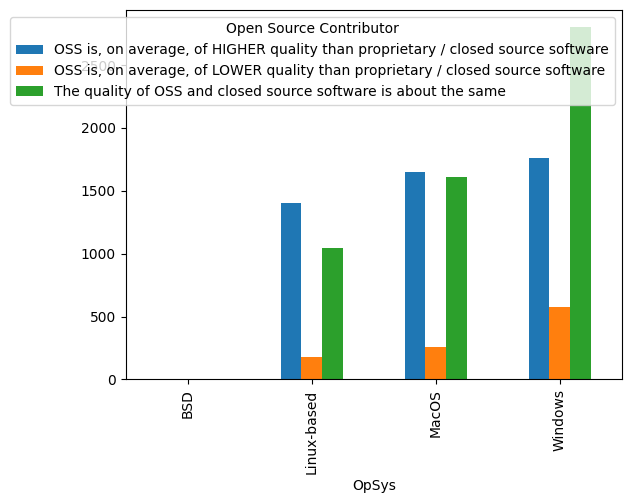

In [23]:
df.pivot_table(index='OpSys', columns='OpenSource',values='Respondent',aggfunc='count',fill_value=0).plot(kind='bar')
plt.legend(title='Open Source Contributor')

In [ ]:
pivot_table = 

# Plotting
pivot_table.plot(kind=' ')

<details><Summary>Click here for the solution</Summary>

```python
pivot_table = pd.pivot_table(df, index='Opr', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()
```
</details>


### Scenario 3: Job Satisfaction and Career Aspirations by Employment Status

In this scenario, you can explore a deeper interpretation of the data using Pivot charts. Let us explore how employment status and job satisfaction affects the career aspirations of the respondents. 

For this, you need to create a pivot table with 'Employment' and 'JobSat' fields as index, 'MgrWant' field as columns and 'Respondent' as values with aggregation function as 'count'. Complete the following code block to generate the said pivot chart.

Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


<Axes: xlabel='Employment,JobSat'>

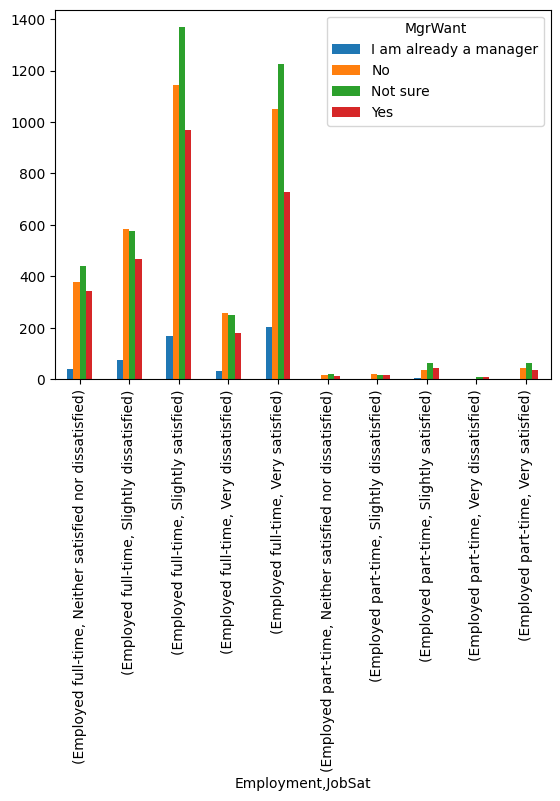

In [26]:
df.pivot_table(index=['Employment','JobSat'],columns=['MgrWant'],values='Respondent',aggfunc='count',fill_value=0).plot(kind='bar')

In [ ]:
df.columns

<details><summary>Click here for solution</summary>

```python
pivot_table = pd.pivot_table(df, index='Employment', columns='MgrWant', values='RespondentID', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True)
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.xticks(rotation=0)
plt.show()
```
</details>


In [ ]:
df.to_excel('./data.xlsx', index=False)

In [18]:
#conn = sqlite3.connect("m4_survey_data.sqlite")  # open a database connection
QUERY = """SELECT * FROM LanguageWorkedWith """
df_lan = pd.read_sql(QUERY, conn)
df_lan.head()

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL


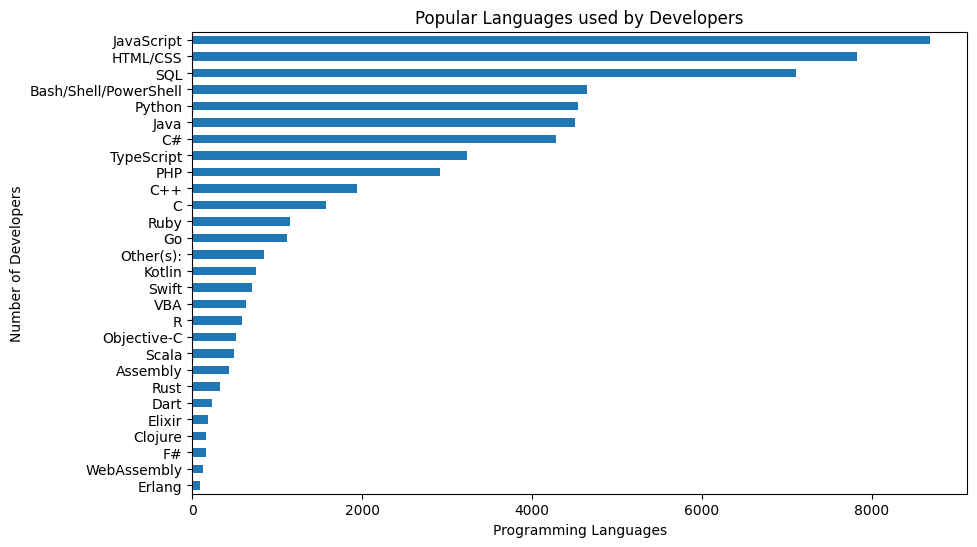

In [27]:
df_lan['LanguageWorkedWith'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Popular Languages used by Developers')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Developers')
plt.show()

In [28]:
QUERY = """SELECT * FROM DatabaseWorkedWith """
df_db = pd.read_sql(QUERY, conn)
df_db.head()

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|>


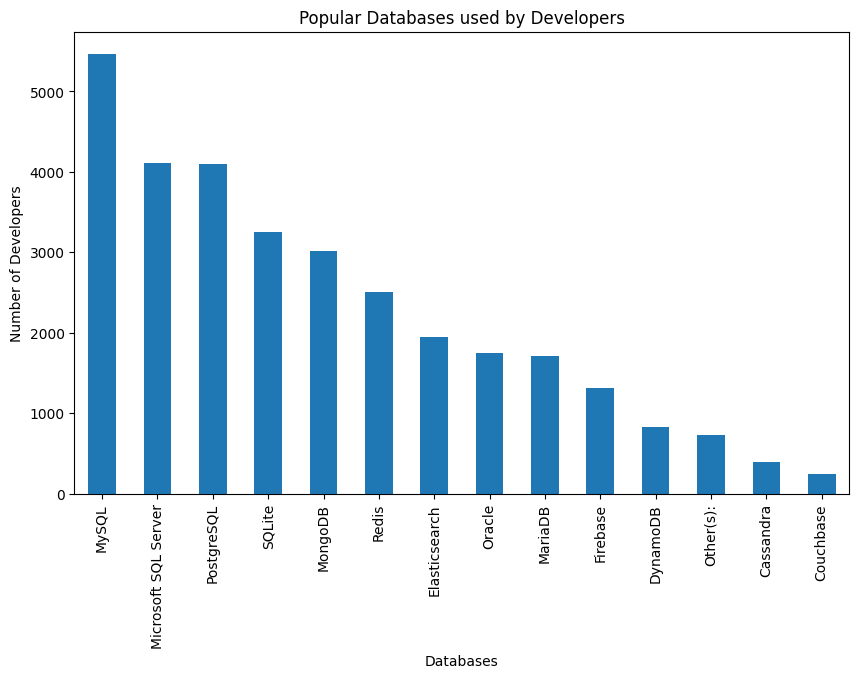

In [29]:
df_db['DatabaseWorkedWith'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Popular Databases used by Developers')
plt.xlabel('Databases')
plt.ylabel('Number of Developers')
plt.show()

In [24]:
QUERY = """SELECT * FROM PlatformWorkedWith """
df_platform = pd.read_sql(QUERY, conn)
df_platform.head()

,Respondent,PlatformWorkedWith
0,4,Linux
1,4,Windows
2,9,AWS
3,9,Docker
4,9,Heroku


<Axes: xlabel='PlatformWorkedWith'>

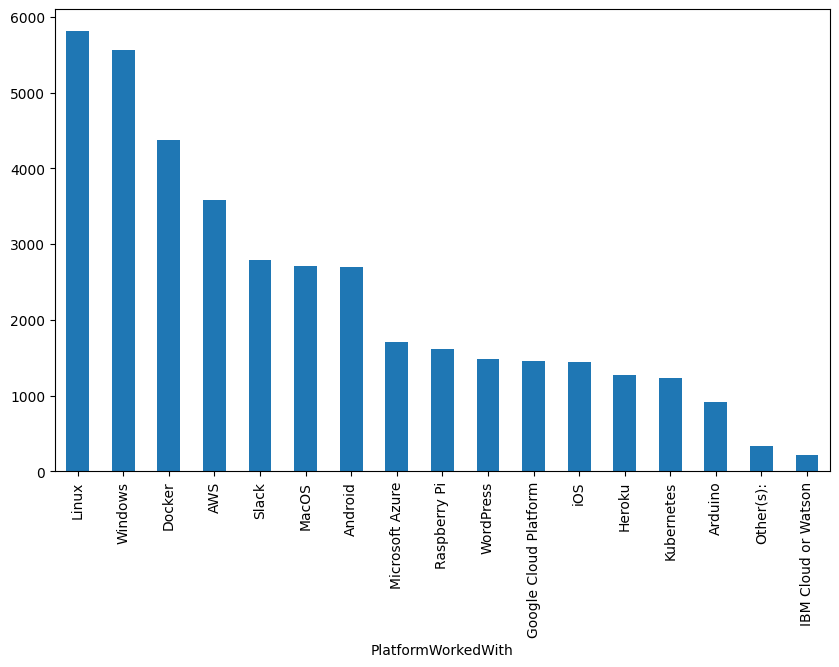

In [19]:
df_platform['PlatformWorkedWith'].value_counts().plot(kind='bar', figsize=(10, 6))

In [22]:
QUERY = """SELECT * FROM WebframeWorkedWith """
df_web = pd.read_sql(QUERY, conn)
df_web.head()

,Respondent,WebFrameWorkedWith
0,9,Express
1,9,Ruby on Rails
2,9,Other(s):
3,13,Angular/Angular.js
4,13,ASP.NET


<Axes: xlabel='WebFrameWorkedWith'>

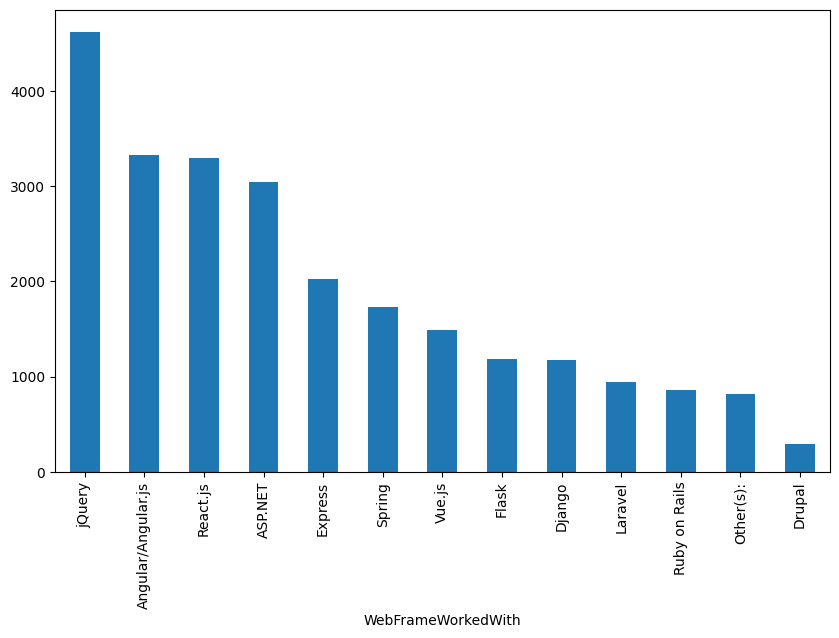

In [23]:
df_web['WebFrameWorkedWith'].value_counts().plot(kind='bar', figsize=(10, 6))

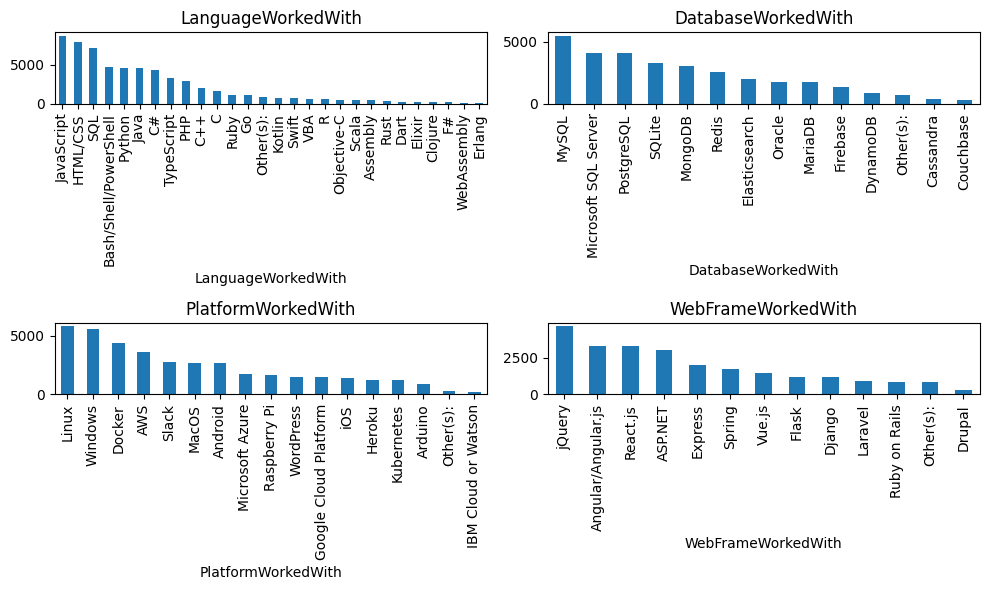

In [28]:
fig=plt.figure(figsize=(40, 40))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

df_lan["LanguageWorkedWith"].value_counts().plot(kind="bar", figsize=(10, 6), ax=ax1)
df_db["DatabaseWorkedWith"].value_counts().plot(kind="bar", figsize=(10, 6), ax=ax2)
df_platform["PlatformWorkedWith"].value_counts().plot(kind="bar", figsize=(10, 6), ax=ax3)
df_web["WebFrameWorkedWith"].value_counts().plot(kind="bar", figsize=(10, 6), ax=ax4)

ax1.set_title("LanguageWorkedWith")
ax2.set_title("DatabaseWorkedWith")
ax3.set_title("PlatformWorkedWith")
ax4.set_title("WebFrameWorkedWith")

plt.tight_layout()

In [29]:
with pd.ExcelWriter('./excel_sheets/dashboard.xlsx') as writer:
    df_lan.to_excel(writer, sheet_name='LanguageWorkedWith', index=False)
    df_db.to_excel(writer, sheet_name='DatabaseWorkedWith', index=False)
    df_platform.to_excel(writer, sheet_name='PlatformWorkedWith', index=False)
    df_web.to_excel(writer, sheet_name='WebFrameWorkedWith', index=False)

## Future Technology Trends 

In [30]:
QUERY = """SELECT * FROM LanguageDesireNextYear """
df_ld = pd.read_sql(QUERY, conn)
df_ld.head()

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell


In [31]:
QUERY = """SELECT * FROM DatabaseDesireNextYear """
df_dd = pd.read_sql(QUERY, conn)
df_dd.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [32]:
QUERY = """SELECT * FROM PlatformDesireNextYear """
df_pd = pd.read_sql(QUERY, conn)
df_pd.head()

,Respondent,PlatformDesireNextYear
0,4,Linux
1,4,Windows
2,9,AWS
3,9,Docker
4,9,Heroku


In [33]:
QUERY = """SELECT * FROM WebFrameDesireNextYear """
df_wd = pd.read_sql(QUERY, conn)
df_wd.head()

,Respondent,WebFrameDesireNextYear
0,9,Express
1,9,Ruby on Rails
2,9,Other(s):
3,13,Express
4,13,Vue.js


In [35]:
with pd.ExcelWriter("./excel_sheets/future_desire.xlsx") as writer:
    df_ld.to_excel(writer, sheet_name="LanguageDesire", index=False)
    df_dd.to_excel(writer, sheet_name="DatabaseDesire", index=False)
    df_pd.to_excel(writer, sheet_name="PlatformDesire", index=False)
    df_wd.to_excel(writer, sheet_name="WebFrameDesire", index=False)

## Demographics Dashboard 

In [37]:
df.to_excel('./excel_sheets/demographics.xlsx', index=False)

In [9]:
QUERY = """SELECT * FROM Gender """
df_g = pd.read_sql(QUERY, conn)
df_g.head()

,Respondent,Gender
0,4,Man
1,9,Man
2,13,Man
3,16,Man
4,17,Man


In [10]:
df_g.to_excel('./excel_sheets/gender.xlsx', index=False)

In [41]:
df_g.loc[0,'Gender']

'Man'

In [11]:
df_temp = pd.read_excel('./excel_sheets/demographics.xlsx')


,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,Row Labels,Count of Respondent
2,Spain,251
3,Netherlands,254
4,Australia,285


In [13]:
query = """
SELECT *
FROM master
JOIN Gender  ON master.Respondent = Gender.Respondent
"""

# Execute the query and store the result in a DataFrame
df_new = pd.read_sql_query(query, conn)

In [14]:
df_new.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase,Respondent,Gender
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy,4,Man
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult,9,Man
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy,13,Man
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult,16,Man
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy,17,Man


In [15]:
df_new.to_excel('./excel_sheets/demographics_new.xlsx', index=False)

Copyright © IBM Corporation. All rights reserved.
